<a href="https://colab.research.google.com/github/LeTrungDunggg/FINAL-AI/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import tensorflow.keras.layers as tfl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/PROJECT/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 9608 images belonging to 4 classes.


In [ ]:
training_data.class_indices

{'ChuaXacDinh': 0, 'NON': 1, 'ORGANIC': 2, 'RECYLING': 3}

In [ ]:
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/PROJECT/TEST',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 3152 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,activation='relu',input_shape=(150,150,3),padding='same',kernel_size=(3,3)),
    tf.keras.layers.Conv2D(filters=32,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.Conv2D(filters=64,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.Conv2D(filters=128,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(units=512,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(units=256,activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Organic')
    # and 1 for the other ('Recycled')
    tf.keras.layers.Dense(units=3,activation='softmax'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = [tf.keras.metrics.AUC(name = 'auc')])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(training_data,
                              validation_data=validation_data,
                              epochs=100,
                              verbose=1, callbacks=[EarlyStopping(monitor='val_loss',patience=30)])

In [ ]:
Score=model.evaluate(validation_data,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Test loss 0.7546325325965881
Test accuary 0.9099243879318237


In [ ]:
model.save("/content/drive/MyDrive/AI/PROJECT/project1.h5")

In [ ]:
model_CNN=load_model('/content/drive/MyDrive/AI/PROJECT/project1.h5')

RECYCLING


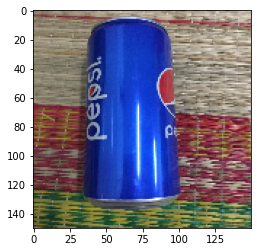

In [ ]:
img=load_img('/content/drive/MyDrive/AI/PROJECT/test1/pepsi.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Chuaxacdinh'
if round(result[0][1])==1:
  prediction='NON RECYCLING'
if round(result[0][2])==1:
  prediction='ORGANIC'
if round(result[0][3])==1:
  prediction='RECYCLING'
print(prediction)

ORGANIC


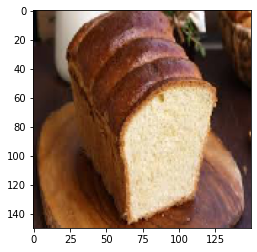

In [ ]:
img=load_img('/content/drive/MyDrive/AI/PROJECT/test1/O_12183.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Chuaxacdinh'
if round(result[0][1])==1:
  prediction='NON RECYCLING'
if round(result[0][2])==1:
  prediction='ORGANIC'
if round(result[0][3])==1:
  prediction='RECYCLING'
print(prediction)

NON RECYCLING


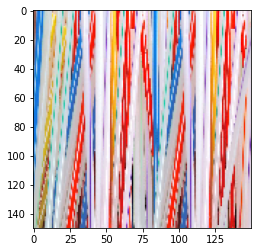

In [ ]:
img=load_img('/content/drive/MyDrive/AI/PROJECT/test1/o3 (29).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Chuaxacdinh'
if round(result[0][1])==1:
  prediction='NON RECYCLING'
if round(result[0][2])==1:
  prediction='ORGANIC'
if round(result[0][3])==1:
  prediction='RECYCLING'
print(prediction)